In [2]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

df1 = pd.read_csv('fashion-mnist-train-1.csv')
df2 = pd.read_csv('fashion-mnist-train-2.csv')

df = pd.concat([df1, df2], ignore_index=True)

In [4]:
y_train = df['label'].values
x_train = df.drop('label', axis=1).values
x_train = x_train.reshape(-1, 28, 28)
x_train = x_train / 255.0
x_train = np.expand_dims(x_train, -1)

In [5]:
x_train.shape, y_train.shape

((44998, 28, 28, 1), (44998,))

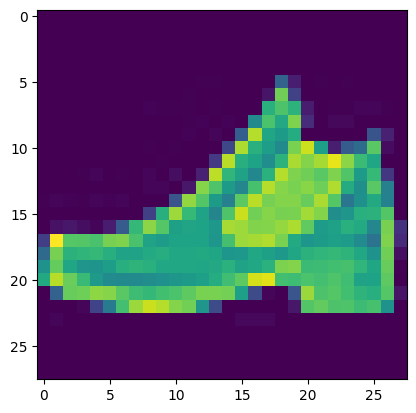

In [6]:
plt.figure()
plt.imshow(x_train[1])
plt.grid(False)
plt.show()

In [7]:
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
batch_size = 128
epochs = 5

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
317/317 [==============================] - 11s 34ms/step - loss: 0.7631 - accuracy: 0.7239 - val_loss: 0.4998 - val_accuracy: 0.8196
Epoch 2/5
317/317 [==============================] - 11s 35ms/step - loss: 0.4713 - accuracy: 0.8269 - val_loss: 0.4309 - val_accuracy: 0.8529
Epoch 3/5
317/317 [==============================] - 11s 35ms/step - loss: 0.4191 - accuracy: 0.8475 - val_loss: 0.4068 - val_accuracy: 0.8513
Epoch 4/5
317/317 [==============================] - 11s 34ms/step - loss: 0.3850 - accuracy: 0.8616 - val_loss: 0.3801 - val_accuracy: 0.8667
Epoch 5/5
317/317 [==============================] - 11s 33ms/step - loss: 0.3611 - accuracy: 0.8711 - val_loss: 0.3578 - val_accuracy: 0.8727


In [9]:
df_test = pd.read_csv('fashion-mnist_test.csv')

y_test = df_test['label'].values
x_test = df_test.drop('label', axis=1).values

x_test = x_test.reshape(-1, 28, 28)
x_test = x_test / 255.0
x_test = np.expand_dims(x_test, -1)

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3321138024330139
Test accuracy: 0.8837000131607056


In [26]:
model.save("fashion_mnist")

INFO:tensorflow:Assets written to: fashion_mnist\assets


INFO:tensorflow:Assets written to: fashion_mnist\assets


In [27]:

loaded_model = tf.keras.models.load_model('fashion_mnist')